In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [3]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [4]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [5]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [6]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [7]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

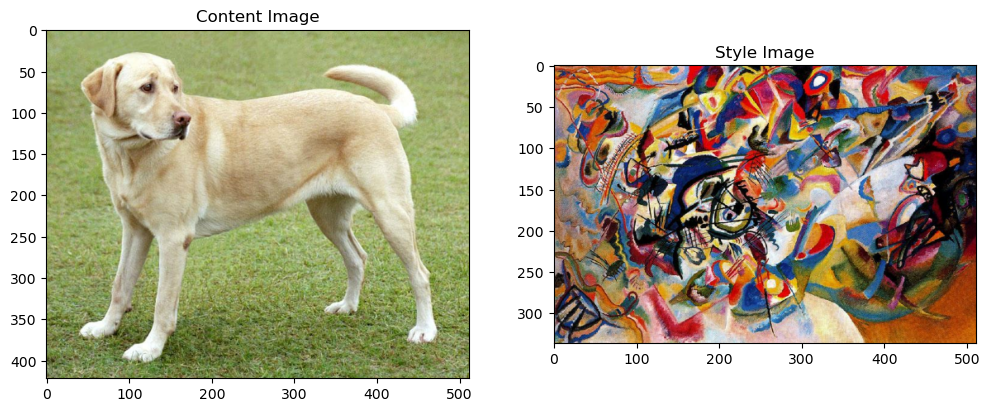

In [8]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [9]:
pip install tensorflow_hub

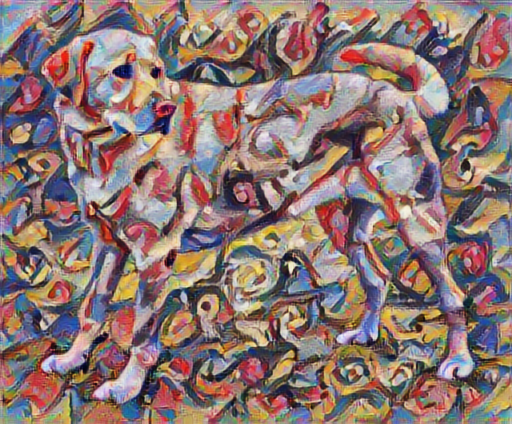

W0000 00:00:1723784597.170141  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.178586  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.187029  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.201071  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.215101  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.220868  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784597.235559  157940 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


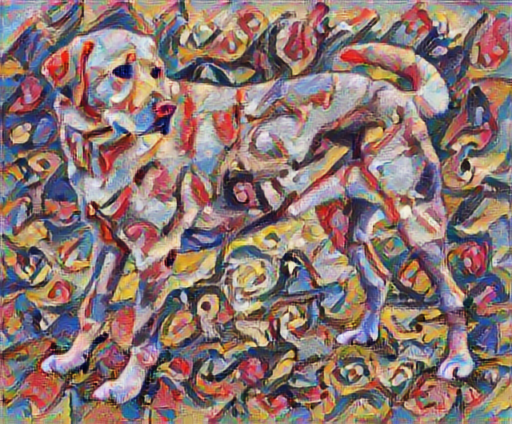

In [10]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [11]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

 75505664/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

 89186304/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

105455616/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

109060096/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

122617856/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

134225920/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

142614528/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

152772608/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

163667968/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

176168960/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

184557568/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

196780032/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

209723392/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

218112000/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

234012672/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

251043840/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

252108800/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

260055040/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

275963904/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

292511744/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

293609472/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

301998080/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

318152704/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

333766656/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

335552512/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

349978624/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

360718336/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

374161408/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

385884160/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

394272768/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

410509312/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

411049984/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

426958848/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

443834368/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

444604416/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

460873728/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

476880896/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

478158848/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

486547456/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

502726656/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

511713280/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

526794752/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

540491776/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

546234368/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

553656320/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

562044928/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


W0000 00:00:1723784604.404847  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.406170  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.407424  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.408658  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.409908  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.411165  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.412411  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.413737  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.415097  157783 gp

W0000 00:00:1723784604.620302  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.621553  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.622983  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.624436  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.625940  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.627586  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.629240  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.630889  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.632530  157783 gp

W0000 00:00:1723784604.821487  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.822624  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.824018  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.825404  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.826838  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.828709  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.831587  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.837609  157783 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1723784604.842284  157783 gp

TensorShape([1, 1000])

In [12]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('Labrador_retriever', 0.49317157),
 ('golden_retriever', 0.23665272),
 ('kuvasz', 0.03635751),
 ('Chesapeake_Bay_retriever', 0.02418279),
 ('Greater_Swiss_Mountain_dog', 0.018646086)]

In [13]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


 4202496/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

20594688/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

33562624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

45105152/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

58146816/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

71499776/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [14]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [15]:
def vgg_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [16]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

C:\Users\DHANA\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_48']. Received: the structure of inputs=*
  warnings.warn(


block1_conv1
  shape:  (1, 336, 512, 64)
  min:  0.0
  max:  835.5255
  mean:  33.97525

block2_conv1
  shape:  (1, 168, 256, 128)
  min:  0.0
  max:  4625.8857
  mean:  199.82687

block3_conv1
  shape:  (1, 84, 128, 256)
  min:  0.0
  max:  8789.239
  mean:  230.78099

block4_conv1
  shape:  (1, 42, 64, 512)
  min:  0.0
  max:  21566.13
  mean:  791.24005

block5_conv1
  shape:  (1, 21, 32, 512)
  min:  0.0
  max:  3189.2542
  mean:  59.179478



In [17]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [18]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [19]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


C:\Users\DHANA\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_70']. Received: the structure of inputs=*
  warnings.warn(


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0055228476
    max:  28014.564
    mean:  263.79022

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.48
    mean:  9100.949

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.3
    mean:  7660.9766

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320501.0
    mean:  134288.86

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.39
    mean:  1487.0381

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8792
    mean:  13.764152


In [20]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [21]:
image = tf.Variable(content_image)

In [22]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [23]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [24]:
style_weight=1e-2
content_weight=1e4

In [25]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [26]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

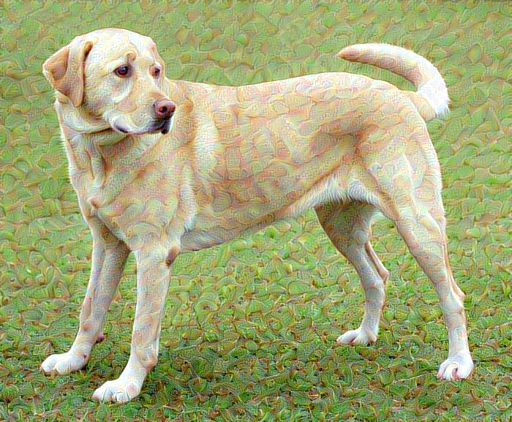

In [27]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

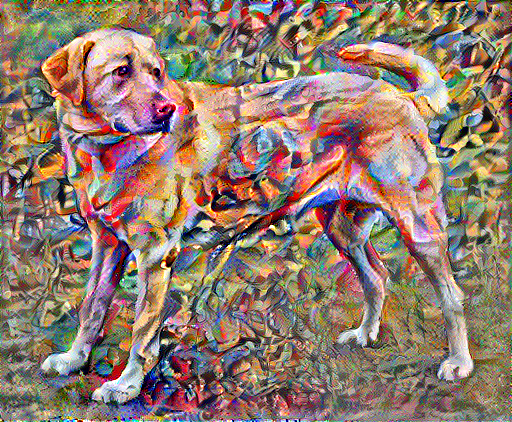

Train step: 1000
Total time: 4991.9


In [28]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))